# 8 Puzzle 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import tracemalloc
import time
import pandas as pd
from statistics import mean

In [2]:
goal_state = np.array((1,2,3,4,5,6,7,8,0))

In [28]:
state_matrix = np.array(( [1,6,2],
                          [5,3,0],
                          [4,7,8]))
 
state = state_matrix.reshape((9,))
state

array([1, 6, 2, 5, 3, 0, 4, 7, 8])

In [4]:
def find_all_chidren(state):
    zero = np.where(state == 0)[0][0]
    zero_x = zero//3
    zero_y = zero%3
    dic_res = {}
    if zero_x != 0:
        dic_res['up'] = np.copy(state)
        dic_res['up'][zero-3],dic_res['up'][zero] =dic_res['up'][zero],dic_res['up'][zero-3]
    if zero_y != 2 :
        dic_res['right'] =  np.copy(state)
        dic_res['right'][zero+1],dic_res['right'][zero] =dic_res['right'][zero],dic_res['right'][zero+1]
    if zero_x != 2 :
        dic_res['down'] =  np.copy(state)
        dic_res['down'][zero+3],dic_res['down'][zero] =dic_res['down'][zero],dic_res['down'][zero+3]
    if zero_y != 0:
        dic_res['left'] =  np.copy(state)
        dic_res['left'][zero-1],dic_res['left'][zero] =dic_res['left'][zero],dic_res['left'][zero-1]
    return dic_res

In [31]:
def show_result(result,show =True):
    if str(goal_state) not in result:
        print("goal state not found")
        return
    parent = str(goal_state)
    goal_path = ''
    while parent != '':
        goal_path = result[parent]['action']+parent+ goal_path
        parent = result[parent]['parent']
    move = ""
    all_of_cost = result[str(goal_state)]['G']
    print("number of steps(depth)(cost) : ",all_of_cost)
    if show:
        print(goal_path)
        num_mat_in_line = 5
        fig, axs = plt.subplots((all_of_cost)//num_mat_in_line +2,num_mat_in_line+1,figsize=(all_of_cost,all_of_cost))
        for i in range((all_of_cost)//num_mat_in_line+2):
            for j in range(num_mat_in_line+1):
                axs[i,j].axis('off')
        fig.subplots_adjust(left=0.125, bottom=0.001, right=0.9, top=0.9, wspace=0.2, hspace=0.9)
        axs[0,0].set_title('start state')
        axs[(all_of_cost)//num_mat_in_line,(all_of_cost)%num_mat_in_line].set_title('goal state')
    i = 0
    j=1
    all_moves = ''
    while i < len(goal_path):
        state_tmp = np.arange(9)
        if goal_path[i] == '[':
            state_tmp[0] = goal_path[i+1]
            state_tmp[1] = goal_path[i+3]
            state_tmp[2] = goal_path[i+5]
            state_tmp[3] = goal_path[i+7]
            state_tmp[4] = goal_path[i+9]
            state_tmp[5] = goal_path[i+11]
            state_tmp[6] = goal_path[i+13]
            state_tmp[7] = goal_path[i+15]
            state_tmp[8] = goal_path[i+17]
            i += 19
            move = ""
            while   i < len(goal_path) and goal_path[i] != '[':
                move += goal_path[i]
                i+=1
            i -= 1
            all_moves += move + ' '
            if show:
                movement = {'up':"↑",'down':"↓",'right':"→",'left':"←",'':''}
                state_tmp = state_tmp.reshape((3,3))
                axs[((j-1)//num_mat_in_line),((j-1)%num_mat_in_line)].axis('on')
                axs[((j-1)//num_mat_in_line),((j-1)%num_mat_in_line)].set_ylabel('')
                axs[((j-1)//num_mat_in_line),((j-1)%num_mat_in_line)].set_xlabel(movement[move],fontsize=20)
                axs[((j-1)//num_mat_in_line),((j-1)%num_mat_in_line)].set_yticklabels([])
                axs[((j-1)//num_mat_in_line),((j-1)%num_mat_in_line)].set_xticklabels([])
                cmap = ListedColormap(['r','w','w','w','w','w','w','w','w'])
                axs[((j-1)//num_mat_in_line),((j-1)%num_mat_in_line)].matshow(state_tmp, cmap=cmap)
                axs[((j-1)//num_mat_in_line),((j-1)%num_mat_in_line)].set_yticks([.5,1.5, 2.5], minor=True)
                axs[((j-1)//num_mat_in_line),((j-1)%num_mat_in_line)].set_xticks([.5,1.5, 2.5], minor=True)
                axs[((j-1)//num_mat_in_line),((j-1)%num_mat_in_line)].grid(True,linestyle="-",which='minor')
                axs[((j-1)//num_mat_in_line),((j-1)%num_mat_in_line)].tick_params(tick1On = False)
                axs[((j-1)//num_mat_in_line),((j-1)%num_mat_in_line)].tick_params(tick2On = False)

    #             axs[((j-1)//num_mat_in_line),((j-1)%num_mat_in_line)].rc('grid', linestyle="-", color='black')
                for m in range(3):
                    for n in range(3):
                        axs[((j-1)//num_mat_in_line),((j-1)%num_mat_in_line)].text(m, n, state_tmp[n,m], va='center', ha='center')
                j += 1
        i+=1
    print("Sequence of actions : ",all_moves)

In [6]:
def find_H(state):
    # find_manhattan_distance
    # i//3 is row i%3 is col
    #goal:
    # 1,2,3
    # 4,5,6
    # 7,8,0
    res = 0
    for i in range(len(state)):
        if state[i] == 0 :continue
        res += abs(i//3 - (state[i]-1)//3) + abs(i%3 - (state[i]-1)%3)
    return res

In [7]:
def run_A_STAR(state):
    states = {str(state):{'parent':'','action':'','F':find_H(state),'G':0,'H':find_H(state)}}
    list_of_state = [state]
    list_of_f = [find_H(state)]
#     def sorting_arg_by_F(state):
#         return states[str(state)]['F']
    while list_of_state !=[] and not all (state == goal_state):
        state = list_of_state.pop(0)
        list_of_f.pop(0)
        G = states[str(state)]['G']
        G += 1
        children = find_all_chidren(state)
        for i in children:
            if str(children[i]) in states:
                if states[str(children[i])]['G'] > G:
                    states[str(children[i])]['parent'] = str(state)
                    states[str(children[i])]['G']= G
                    states[str(children[i])]['F']= G + states[str(children[i])]['H']
                    states[str(children[i])]['action'] = i
#                     list_of_state = sorted(list_of_state,key=sorting_arg_by_F)
                    list_of_state.append(children[i])
                    list_of_f.append ( G + states[str(children[i])]['H'])
                    sort = np.argsort(list_of_f)
                    list_of_f =list(np.array((list_of_f))[sort])
                    list_of_state =list(np.array((list_of_state))[sort])                       
            else:
                states[str(children[i])] = {'parent':str(state),'action':i,'F':G+find_H(children[i]),
                                            'G':G,'H':find_H(children[i])}
                list_of_state.append(children[i])
                list_of_f.append(G + find_H(children[i]))
                
                sort = np.argsort(list_of_f)
                list_of_f =list(np.array((list_of_f))[sort])
                list_of_state =list(np.array((list_of_state))[sort])
#                 list_of_state = sorted(list_of_state,key=sorting_arg_by_F)
    return states

number of steps(depth)(cost) :  9
[1 6 2 5 3 0 4 7 8]left[1 6 2 5 0 3 4 7 8]up[1 0 2 5 6 3 4 7 8]right[1 2 0 5 6 3 4 7 8]down[1 2 3 5 6 0 4 7 8]left[1 2 3 5 0 6 4 7 8]left[1 2 3 0 5 6 4 7 8]down[1 2 3 4 5 6 0 7 8]right[1 2 3 4 5 6 7 0 8]right[1 2 3 4 5 6 7 8 0]
Sequence of actions :  left up right down left left down right right  


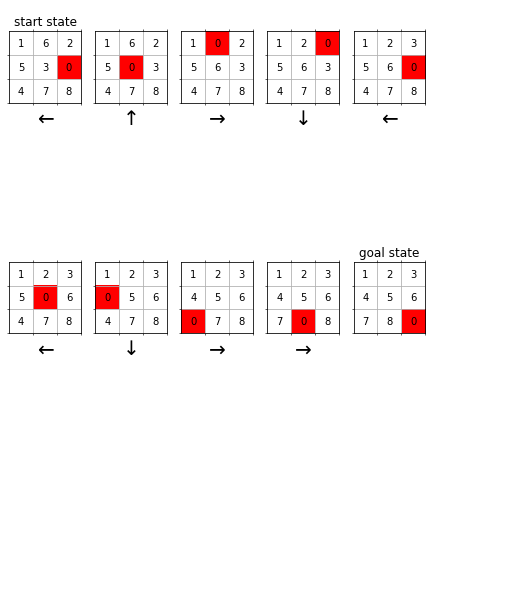

In [32]:
result = run_A_STAR(state)    
show_result(result)

In [9]:
#!!! In this problem beacuase chnage evrey state to its children has cost 1 then algorithm works exact same as BFS  
def run_UCS(state):
    states = {str(state):{'parent':'','action':'','G':0}}
    list_of_state = [state]
#     def sorting_arg_by_G(state):
#         return states[str(state)]['G']
    while list_of_state !=[] and not all(state == goal_state):
        state = list_of_state.pop(0)
        G = states[str(state)]['G']
        G += 1
        children = find_all_chidren(state)
        for i in children:
            if str(children[i]) in states:
                if states[str(children[i])]['G'] > G: #this condition never happen
                    states[str(children[i])]['parent'] = str(state)
                    states[str(children[i])]['G']= G
                    states[str(children[i])]['action'] = i
                    list_of_state.append(children[i])
#                     list_of_state = sorted(list_of_state,key=sorting_arg_by_G)
            else:
                list_of_state.append(children[i])
                states[str(children[i])] = {'parent':str(state),'action':i ,'G':G}
                # !! we dont need sort any more because states with less G first meets in children
#                 list_of_state = sorted(list_of_state,key=sorting_arg_by_G)
    return states  

number of steps(depth)(cost) :  9
[1 6 2 5 3 0 4 7 8]left[1 6 2 5 0 3 4 7 8]up[1 0 2 5 6 3 4 7 8]right[1 2 0 5 6 3 4 7 8]down[1 2 3 5 6 0 4 7 8]left[1 2 3 5 0 6 4 7 8]left[1 2 3 0 5 6 4 7 8]down[1 2 3 4 5 6 0 7 8]right[1 2 3 4 5 6 7 0 8]right[1 2 3 4 5 6 7 8 0]
Sequence of actions :  left up right down left left down right right  


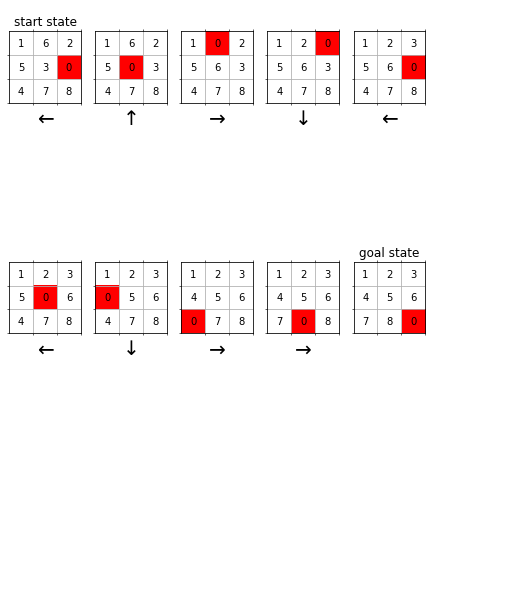

In [10]:
result = run_UCS(state)
show_result(result)  

In [11]:
def run_BFS(state):
    queue = [state]
    visited = {str(state):{'parent':'','action':'','G':0}}
    while queue!=[] and not all(state == goal_state):
        state = queue.pop(0)
        cost = visited[str(state)]['G']
        childern = find_all_chidren(state)
        for i in childern:
            if str(childern[i]) not in visited:
                queue.append(childern[i])
                visited[str(childern[i])] = {}
                visited[str(childern[i])]['parent'] = str(state)
                visited[str(childern[i])]['action'] = i
                visited[str(childern[i])]['G'] = cost+1
    return visited

number of steps(depth)(cost) :  9
[1 6 2 5 3 0 4 7 8]left[1 6 2 5 0 3 4 7 8]up[1 0 2 5 6 3 4 7 8]right[1 2 0 5 6 3 4 7 8]down[1 2 3 5 6 0 4 7 8]left[1 2 3 5 0 6 4 7 8]left[1 2 3 0 5 6 4 7 8]down[1 2 3 4 5 6 0 7 8]right[1 2 3 4 5 6 7 0 8]right[1 2 3 4 5 6 7 8 0]
Sequence of actions :  left up right down left left down right right  


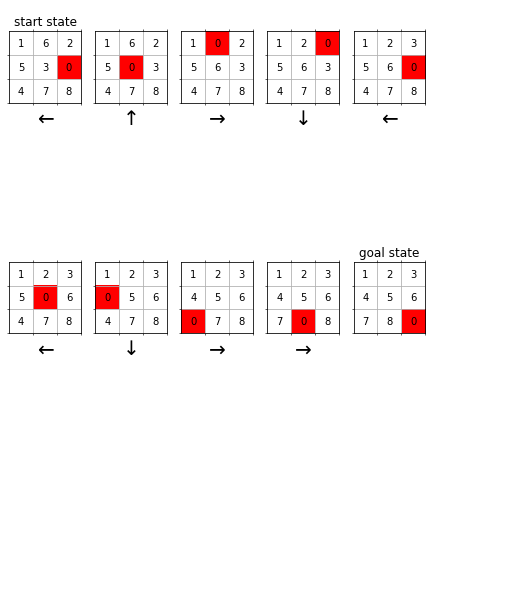

In [12]:
result = run_BFS(state) 
show_result(result)

In [13]:
def run_DFS(state,max_depth = 33 ):
    stack = [state]
    visited = {str(state):{'parent':'','action':'','G':0}}
    while stack!=[] and not all(state == goal_state):
        state = stack.pop()
        cost = visited[str(state)]['G']
        if cost+1 > max_depth:
            continue
        childern = find_all_chidren(state)
        for i in childern:
            if str(childern[i]) not in visited or visited[str(childern[i])]['G'] > cost+1:
                stack.append(childern[i])
                visited[str(childern[i])] = {}
                visited[str(childern[i])]['parent'] = str(state)
                visited[str(childern[i])]['action'] = i
                visited[str(childern[i])]['G'] = cost+1
    return visited

number of steps(depth)(cost) :  11
[1 6 2 5 3 0 4 7 8]left[1 6 2 5 0 3 4 7 8]left[1 6 2 0 5 3 4 7 8]down[1 6 2 4 5 3 0 7 8]right[1 6 2 4 5 3 7 0 8]up[1 6 2 4 0 3 7 5 8]up[1 0 2 4 6 3 7 5 8]right[1 2 0 4 6 3 7 5 8]down[1 2 3 4 6 0 7 5 8]left[1 2 3 4 0 6 7 5 8]down[1 2 3 4 5 6 7 0 8]right[1 2 3 4 5 6 7 8 0]
Sequence of actions :  left left down right up up right down left down right  


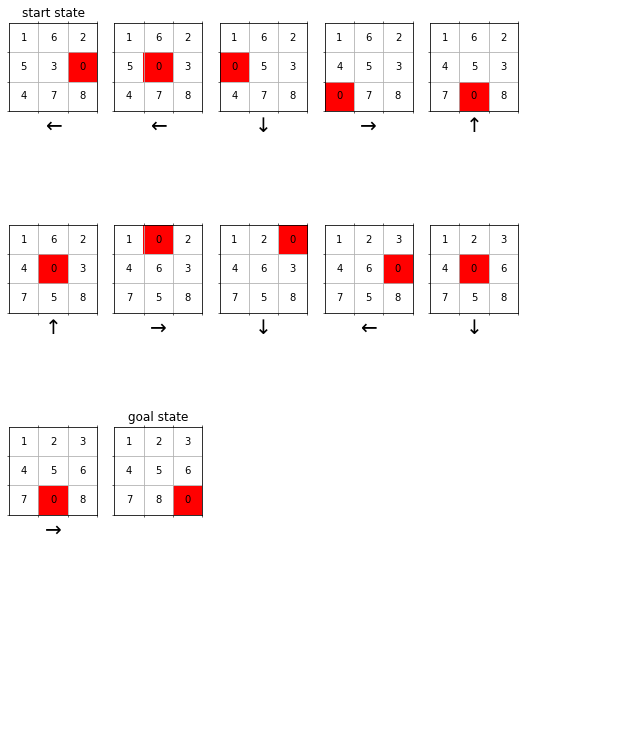

In [14]:
result = run_DFS(state,11)
show_result(result)

In [15]:
def run_IDS(state,show = False):
    i=0
    while i <= 362880:
        if show : print('Depth : ',i)
        result = run_DFS(state,i)
        if str(goal_state) in result:
            return result
        else :
            del result
        i += 1
    return {}

Depth :  0
Depth :  1
Depth :  2
Depth :  3
Depth :  4
Depth :  5
Depth :  6
Depth :  7
Depth :  8
Depth :  9
number of steps(depth)(cost) :  9
[1 6 2 5 3 0 4 7 8]left[1 6 2 5 0 3 4 7 8]up[1 0 2 5 6 3 4 7 8]right[1 2 0 5 6 3 4 7 8]down[1 2 3 5 6 0 4 7 8]left[1 2 3 5 0 6 4 7 8]left[1 2 3 0 5 6 4 7 8]down[1 2 3 4 5 6 0 7 8]right[1 2 3 4 5 6 7 0 8]right[1 2 3 4 5 6 7 8 0]
Sequence of actions :  left up right down left left down right right  


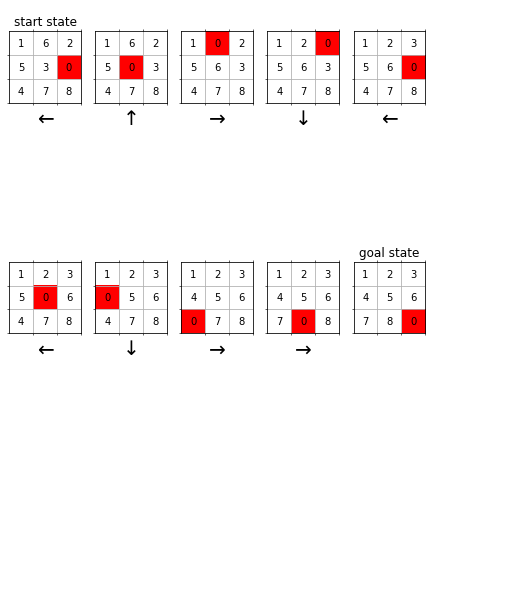

In [16]:
result = run_IDS(state,True)
show_result(result)

In [17]:
examples = {1:[[ 1,2,3,0,7,6,5,4,8 ],[ 0,4,1,2,5,3,7,8,6 ],[ 4,1,3,0,2,6,7,5,8 ],[ 1,2,3,0,4,8,7,6,5 ],[ 1,2,0,4,8,3,7,6,5 ],[ 1,0,2,4,6,3,7,5,8 ],[ 0,1,2,4,5,3,7,8,6 ],[ 1,2,3,0,4,5,7,8,6 ],[ 1,2,3,4,0,5,7,8,6 ],[ 1,2,3,4,5,0,7,8,6 ],[ 0,1,3,4,2,5,7,8,6 ],[ 2,3,5,1,0,4,7,8,6 ],[ 1,6,2,5,3,0,4,7,8 ],[ 1,8,2,0,4,3,7,6,5 ],[ 2,5,3,4,1,6,0,7,8 ],[ 1,2,3,4,6,8,7,5,0 ],[ 1,6,2,5,7,3,0,4,8 ],[ 0,4,1,5,3,2,7,8,6 ],[ 0,5,2,1,8,3,4,7,6 ],[ 1,2,3,0,4,6,7,5,8 ]],
2:[[ 1,3,5,7,2,6,8,0,4 ],[ 4,1,2,3,0,6,5,7,8 ],[ 4,3,1,0,7,2,8,5,6 ],[ 5,2,1,4,8,3,7,6,0 ],[ 2,0,8,1,3,5,4,6,7 ],[ 3,5,6,1,4,8,0,7,2 ],[ 1,0,2,7,5,4,8,6,3 ],[ 5,1,8,2,7,3,4,0,6 ],[ 4,3,0,6,1,8,2,7,5 ],[ 2,4,3,1,6,5,8,0,7 ],[ 1,2,3,6,4,5,7,8,0 ],[ 3,1,2,4,5,6,7,8,0 ],[ 1,2,3,4,8,7,6,5,0 ],[ 1,3,2,5,4,6,7,8,0 ],[ 1,4,2,6,5,8,7,3,0 ]],
3:[[ 2,1,3,4,5,6,8,7,0 ],[ 2,3,1,6,5,4,8,7,0 ],[ 2,3,1,6,4,5,7,8,0 ],[ 1,2,3,6,5,4,8,7,0 ],[ 1,2,3,6,5,4,0,8,7 ],[ 4,5,3,2,8,0,6,7,1 ],[ 4,5,3,2,1,0,8,7,6 ],[ 1,2,4,3,5,0,8,7,6 ],[ 1,2,4,3,5,8,7,0,6 ],[ 2,1,3,4,5,8,7,0,6 ],[ 1,3,5,8,7,0,6,2,4 ],[ 4,3,1,6,5,8,0,2,7 ],[ 7,0,4,8,5,1,6,3,2 ],[ 8,7,2,1,5,0,4,6,3 ],[ 8,3,5,6,4,2,1,0,7 ],[ 1,6,4,0,3,5,8,2,7 ],[ 6,3,8,5,4,1,7,2,0 ],[ 5,8,7,1,4,6,3,0,2 ],[ 2,8,5,3,6,1,7,0,4 ],[ 8,7,6,5,4,3,2,1,0 ]]}
steps = {1:11,2:21,3:33}
algorithms = [run_A_STAR,run_UCS,run_BFS,run_DFS,run_IDS]

In [18]:
time_of_all = {}
memory_of_all = {}
optimal_cost = 0
def run_algorithm_on_examples(algorithm,state,max_depth):
    tracemalloc.start()
    start_time = time.time()
    if (algorithm != run_DFS):
        result = algorithm(state)
    else:
        result = algorithm(state,max_depth)
    end_time = time.time()
    memory = tracemalloc.get_traced_memory()[1]
    tracemalloc.stop()
    is_optimal = True
    global optimal_cost
    if algorithm == run_A_STAR : optimal_cost = result[str(goal_state)]['G']
    if result[str(goal_state)]['G'] != optimal_cost: is_optimal = False
    print("memory : ",memory," ,time : ",(end_time - start_time) ,' ,optimal : ',is_optimal)
    time_of_all[algorithm].append((end_time - start_time))
    memory_of_all[algorithm].append(memory)
    show_result(result,False)
    del result
all_examples = []
# for i in examples:
i=1
for j in examples[i]:
    all_examples.append(j)
    print('>>>>>>>>>>>state : ',j)
    for k in algorithms:
        if k not in time_of_all:
            time_of_all[k]=[]
            memory_of_all[k]=[]
        print('agorithm : ',str(k)[str(k).index("function")+9:str(k).index('at')-1])
        run_algorithm_on_examples(k,np.array(j),steps[i])

>>>>>>>>>>>state :  [1, 2, 3, 0, 7, 6, 5, 4, 8]
agorithm :  run_A_STAR
memory :  45582  ,time :  0.028923749923706055  ,optimal :  True
number of steps(depth)(cost) :  7
Sequence of actions :  right down left up right down right  
agorithm :  run_UCS
memory :  148355  ,time :  0.17057514190673828  ,optimal :  True
number of steps(depth)(cost) :  7
Sequence of actions :  right down left up right down right  
agorithm :  run_BFS
memory :  134550  ,time :  0.2390727996826172  ,optimal :  True
number of steps(depth)(cost) :  7
Sequence of actions :  right down left up right down right  
agorithm :  run_DFS
memory :  69761  ,time :  0.16057062149047852  ,optimal :  True
number of steps(depth)(cost) :  7
Sequence of actions :  down right up left down right right  
agorithm :  run_IDS
memory :  47157  ,time :  0.27725815773010254  ,optimal :  True
number of steps(depth)(cost) :  7
Sequence of actions :  down right up left down right right  
>>>>>>>>>>>state :  [0, 4, 1, 2, 5, 3, 7, 8, 6]
agor

memory :  131779  ,time :  0.7418169975280762  ,optimal :  True
number of steps(depth)(cost) :  8
Sequence of actions :  right up left left down right right down  
>>>>>>>>>>>state :  [1, 6, 2, 5, 3, 0, 4, 7, 8]
agorithm :  run_A_STAR
memory :  21310  ,time :  0.021939516067504883  ,optimal :  True
number of steps(depth)(cost) :  9
Sequence of actions :  left up right down left left down right right  
agorithm :  run_UCS
memory :  325809  ,time :  0.41692447662353516  ,optimal :  True
number of steps(depth)(cost) :  9
Sequence of actions :  left up right down left left down right right  
agorithm :  run_BFS
memory :  325173  ,time :  0.6166379451751709  ,optimal :  True
number of steps(depth)(cost) :  9
Sequence of actions :  left up right down left left down right right  
agorithm :  run_DFS
memory :  82206  ,time :  0.14210033416748047  ,optimal :  False
number of steps(depth)(cost) :  11
Sequence of actions :  left left down right up up right down left down right  
agorithm :  run_I

In [19]:
i=2
for j in examples[i]:
    all_examples.append(j)
    print('>>>>>>>>>>>state : ',j)
    for k in algorithms:
        if k not in time_of_all:
            time_of_all[k]=[]
            memory_of_all[k]=[]
        print('agorithm : ',str(k)[str(k).index("function")+9:str(k).index('at')-1])
        run_algorithm_on_examples(k,np.array(j),steps[i])

>>>>>>>>>>>state :  [1, 3, 5, 7, 2, 6, 8, 0, 4]
agorithm :  run_A_STAR
memory :  38560  ,time :  0.03792524337768555  ,optimal :  True
number of steps(depth)(cost) :  11
Sequence of actions :  right up up left down down left up right right down  
agorithm :  run_UCS
memory :  830471  ,time :  1.1205363273620605  ,optimal :  True
number of steps(depth)(cost) :  11
Sequence of actions :  right up up left down down left up right right down  
agorithm :  run_BFS
memory :  828798  ,time :  1.5388755798339844  ,optimal :  True
number of steps(depth)(cost) :  11
Sequence of actions :  right up up left down down left up right right down  
agorithm :  run_DFS
memory :  15098053  ,time :  57.90089559555054  ,optimal :  False
number of steps(depth)(cost) :  17
Sequence of actions :  right up left left down right up left down right up right up left down right down  
agorithm :  run_IDS
memory :  341923  ,time :  2.935075283050537  ,optimal :  True
number of steps(depth)(cost) :  11
Sequence of act

memory :  9507355  ,time :  14.42479157447815  ,optimal :  True
number of steps(depth)(cost) :  17
Sequence of actions :  up up left down right up right down left up left down down right up right down  
agorithm :  run_BFS
memory :  9507413  ,time :  19.893795013427734  ,optimal :  True
number of steps(depth)(cost) :  17
Sequence of actions :  up up left down right up right down left up left down down right up right down  
agorithm :  run_DFS
memory :  25242248  ,time :  105.31205987930298  ,optimal :  False
number of steps(depth)(cost) :  21
Sequence of actions :  up left up right down left down right right up up left down right down left up up right down down  
agorithm :  run_IDS
memory :  7528575  ,time :  72.01801037788391  ,optimal :  True
number of steps(depth)(cost) :  17
Sequence of actions :  up up left down right up right down left up left down down right up right down  
>>>>>>>>>>>state :  [4, 3, 0, 6, 1, 8, 2, 7, 5]
agorithm :  run_A_STAR
memory :  33198  ,time :  0.031913

memory :  28080800  ,time :  45.82386112213135  ,optimal :  True
number of steps(depth)(cost) :  20
Sequence of actions :  up left down right up left left down right up up right down down left left up right right down  
agorithm :  run_BFS
memory :  28080876  ,time :  61.68780875205994  ,optimal :  True
number of steps(depth)(cost) :  20
Sequence of actions :  up left down right up left left down right up up right down down left left up right right down  
agorithm :  run_DFS
memory :  10916212  ,time :  39.65312576293945  ,optimal :  True
number of steps(depth)(cost) :  20
Sequence of actions :  left up left down right up right down left up up right down down left left up right down right  
agorithm :  run_IDS
memory :  15259116  ,time :  190.4604868888855  ,optimal :  True
number of steps(depth)(cost) :  20
Sequence of actions :  left up left down right up right down left up up right down down left left up right down right  


In [20]:
# execution time of IDS algorithm is very long for example for second hard example "{ 2,3,1,6,5,4,8,7,0 }"
#    it takes 36 mins .so just run A* for hard examples
i=3
for j in examples[i]:
    print('>>>>>>>>>>>state : ',j)
    print('agorithm : run_A_STAR')
    run_algorithm_on_examples(run_A_STAR,np.array(j),steps[i])

>>>>>>>>>>>state :  [2, 1, 3, 4, 5, 6, 8, 7, 0]
agorithm : run_A_STAR
memory :  2165542  ,time :  10.406541585922241  ,optimal :  True
number of steps(depth)(cost) :  22
Sequence of actions :  up left down left up up right right down down left up left down right right up up left down right down  
>>>>>>>>>>>state :  [2, 3, 1, 6, 5, 4, 8, 7, 0]
agorithm : run_A_STAR
memory :  4680041  ,time :  41.23690867424011  ,optimal :  True
number of steps(depth)(cost) :  26
Sequence of actions :  up left left down right up left up right right down down left up up left down right right up left left down right right down  
>>>>>>>>>>>state :  [2, 3, 1, 6, 4, 5, 7, 8, 0]
agorithm : run_A_STAR
memory :  636114  ,time :  1.4996116161346436  ,optimal :  True
number of steps(depth)(cost) :  20
Sequence of actions :  up up left down left down right up right down left left up right up left down right right down  
>>>>>>>>>>>state :  [1, 2, 3, 6, 5, 4, 8, 7, 0]
agorithm : run_A_STAR
memory :  733646  ,time 

In [21]:
print("T (time) , M (memory)")
columns = ["example", "A* T", "A* M", "UCS T", "UCS M", "BFS T","BFS M", "DFS T", "DFS M",
           "IDS T", "IDS M"]
algorithms = [run_A_STAR,run_UCS,run_BFS,run_DFS,run_IDS]
df = pd.DataFrame(list(zip(all_examples,time_of_all[run_A_STAR],memory_of_all[run_A_STAR],
                           time_of_all[run_UCS],memory_of_all[run_UCS],
                           time_of_all[run_BFS],memory_of_all[run_BFS],
                           time_of_all[run_DFS],memory_of_all[run_DFS],
                           time_of_all[run_IDS],memory_of_all[run_IDS],)), columns=columns)
print(df)

T (time) , M (memory)
                        example      A* T    A* M      UCS T     UCS M  \
0   [1, 2, 3, 0, 7, 6, 5, 4, 8]  0.028924   45582   0.170575    148355   
1   [0, 4, 1, 2, 5, 3, 7, 8, 6]  0.036934   37906   0.503750    393945   
2   [4, 1, 3, 0, 2, 6, 7, 5, 8]  0.008977   17053   0.037897     33856   
3   [1, 2, 3, 0, 4, 8, 7, 6, 5]  0.019947   24151   0.143650    124367   
4   [1, 2, 0, 4, 8, 3, 7, 6, 5]  0.010969   14512   0.056848     48333   
5   [1, 0, 2, 4, 6, 3, 7, 5, 8]  0.009974   14132   0.037899     33909   
6   [0, 1, 2, 4, 5, 3, 7, 8, 6]  0.006951   11445   0.016987     19199   
7   [1, 2, 3, 0, 4, 5, 7, 8, 6]  0.006982   12619   0.014959     19525   
8   [1, 2, 3, 4, 0, 5, 7, 8, 6]  0.004987   11850   0.009973     12855   
9   [1, 2, 3, 4, 5, 0, 7, 8, 6]  0.002992    9395   0.002992      8142   
10  [0, 1, 3, 4, 2, 5, 7, 8, 6]  0.008976   13513   0.020978     21079   
11  [2, 3, 5, 1, 0, 4, 7, 8, 6]  0.015957   18913   0.265289    211522   
12  [1, 6, 2, 5,

In [22]:
df.to_excel('HW2_result.xlsx')

In [25]:
print("mean of times of A* : ",mean(time_of_all[run_A_STAR][:35]) ," ,mean of memory usage of A* : ",mean(memory_of_all[run_A_STAR]) )
print("mean of times of UCS : ",mean(time_of_all[run_UCS]), " ,mean of memory usage of UCS : ",mean(memory_of_all[run_UCS]))
print("mean of times of BFS : ",mean(time_of_all[run_BFS]), " ,mean of memory usage of BFS : ",mean(memory_of_all[run_BFS]))
print("mean of times of DFS : ",mean(time_of_all[run_DFS]), " ,mean of memory usage of DFS : ",mean(memory_of_all[run_DFS]))
print("mean of times of IDS : ",mean(time_of_all[run_IDS]), " ,mean of memory usage of IDS : ",mean(memory_of_all[run_IDS]))


mean of times of A* :  0.16375355720520018  ,mean of memory usage of A* :  985943.4727272728
mean of times of UCS :  4.870225484030588  ,mean of memory usage of UCS :  3211063.4857142856
mean of times of BFS :  6.741623742239816  ,mean of memory usage of BFS :  3210758.6285714284
mean of times of DFS :  13.347884675434658  ,mean of memory usage of DFS :  3731554.7714285715
mean of times of IDS :  17.924167469569614  ,mean of memory usage of IDS :  1732011
